# The Identity element for the BTW model

#### (Code for generating the identity element and visualising the results)

In [6]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Create avalanche operator function

In [7]:
def cascader_updated_I(N, sand_matrix):
    # matrix manipulation
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

Choose the size of the sandpile and find the identity element using the (2c - 2c^o)^o formula.

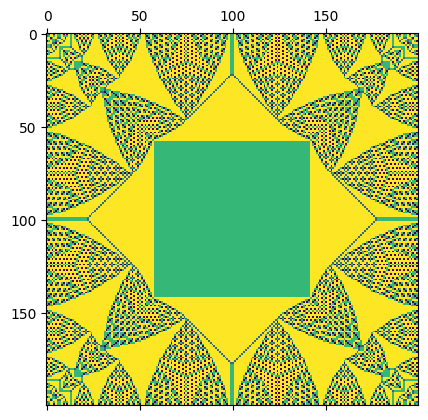

In [8]:
# Define parameter
N = 200

# Create 2c matrix and topple
ident = np.ones((N,N), dtype=int)
ident = ident*6
while np.any(ident >= 4):
    cascader_updated_I(N, ident)

ident2 = (np.ones((N,N), dtype=int) * 6) - ident

while np.any(ident2 >= 4):
    cascader_updated_I(N, ident2)

plt.matshow(ident2)

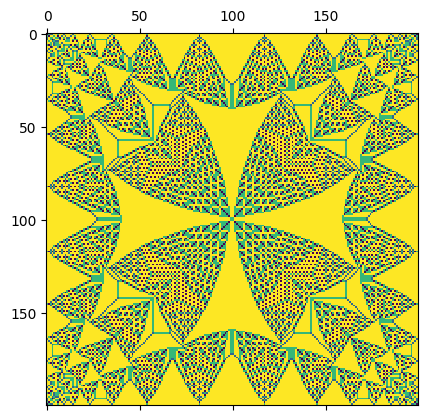

In [9]:
plt.matshow(ident)

## Now we add voids!

#### (Update the avalanche function and run results again)

In [10]:
# Updated avalanche operator for voids
def cascader_updated_I6(N, sand_matrix, voids):
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

    for i in range(len(voids)):
        void = voids[i]
        sand_matrix[void[0]][void[1]] = 0


Create a void shape and view it

In [11]:
# Create void (for 90x90 void)
hexvoid = []
for i in range(30):
    for j in range(30-i):
        hexvoid.append([i,j])
        hexvoid.append([i,89-j])
        hexvoid.append([89-i,j])
        hexvoid.append([89-i,89-j])

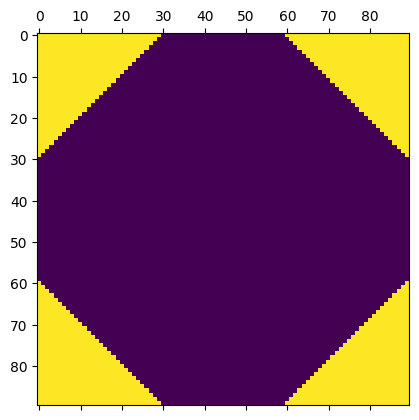

In [12]:
test = np.zeros((90,90), dtype=int)
for k in range(len(hexvoid)):
    t_1 = hexvoid[k]
    test[t_1[0]][t_1[1]] += 1

plt.matshow(test)

Calculate the identity element for the above void shape and visualise the results:

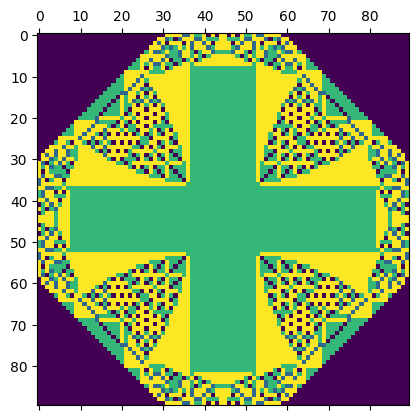

In [13]:
# Define parameter
N = 90

# Create 2c matrix and topple
ident3 = np.ones((N,N), dtype=int)
ident3 = ident3*6
while np.any(ident3 >= 4):
    cascader_updated_I6(N, ident3, hexvoid)

ident4 = (np.ones((N,N), dtype=int) * 6) - ident3

while np.any(ident4 >= 4):
    cascader_updated_I6(N, ident4, hexvoid)

plt.matshow(ident4)

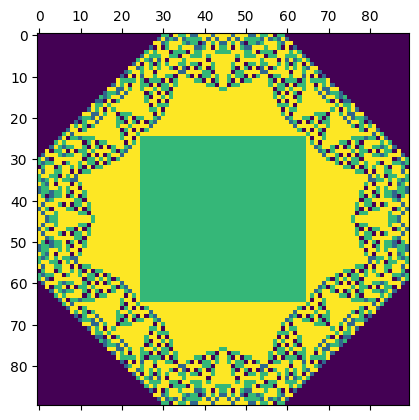

In [14]:
plt.matshow(ident3)

## More examples:

In [15]:
# Void inclusive avalanche operator
def cascader_void(N, sand_matrix, voids):
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

    # This is slow but works for the small numbers we are working with
    for i in range(len(voids)):
        void = voids[i]
        sand_matrix[void[0]][void[1]] = 0

In [16]:
# Returns the identity elements for a given N / void configuration
def void_identities(N, void_config):
    # Define void-inclusive matrix pre-topple
    void_shape = np.zeros((N,N), dtype=int)
    for k in range(len(void_config)):
        vs = void_config[k]
        void_shape[vs[0]][vs[1]] += 1

    build = np.ones((N, N), dtype=int)
    build2 = build - void_shape
    ident = build2 * 6
    ident2 = build2 * 6

    # Topple to get (2c)^o
    while np.any(ident >= 4):
        cascader_void(N, ident, void_config)

    # Topple to get G (identity matrix)
    ident3 = ident2 - ident
    while np.any(ident3 >= 4):
        cascader_void(N, ident3, void_config)

    return ident, ident3

In [17]:
# domino void 
k = 100
N = 3*k
vdomino = []
vdomino.append([k-1,k-1])
vdomino.append([k-1,2*(k-1)])
vdomino.append([2*(k-1),k-1])
vdomino.append([2*(k-1),(k-1)])
vdomino.append([2*(k-1),2*(k-1)])
vdomino.append([int(N/2)-1,int(N/2)-1])

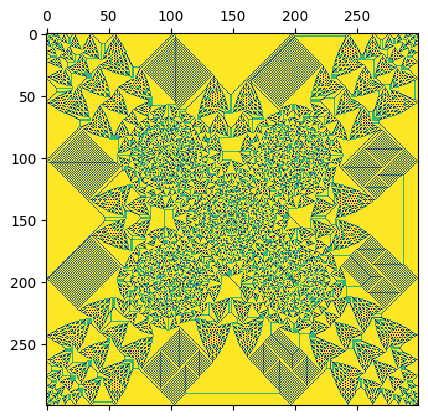

In [18]:
d_sp, d_G = void_identities(N, vdomino)
plt.matshow(d_sp)

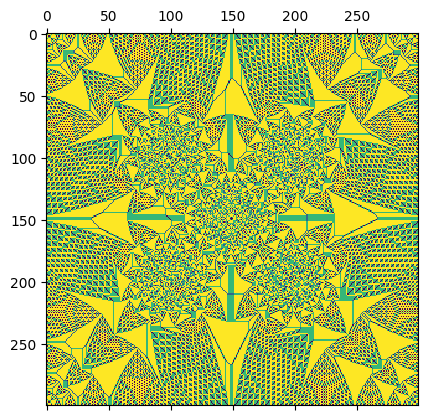

In [19]:
plt.matshow(d_G)